In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator

### Declare some variables & functions

In [2]:
wd = os.path.sep.join([os.path.dirname(os.getcwd()), "data"])
train_path = os.path.sep.join([wd, "train"])
test_path = os.path.sep.join([wd, "test"])
images_path = os.path.sep.join([wd, "images"])
items_path = [os.path.sep.join([images_path, image]) for image in os.listdir(images_path)]

train_size = .7

train_target, test_target = [], []

In [3]:
def create_train_test():
    """
    Used to create a train test set from the folder of all images
    (This do not create train/test folder with 0/1 folders which reside inside, I created these manually)
    """
    for item_path in tqdm(items_path):
        for label in os.listdir(item_path):
            new_path = os.path.sep.join([item_path, label])
            size_imgs = len(os.listdir(new_path))
            for i, img in enumerate(os.listdir(new_path)):
                _img = cv2.imread(os.path.sep.join([new_path, img]))
                train_set = i < (train_size * size_imgs)
                destination = os.path.sep.join([train_path if train_set else test_path, label, img])
                if train_set:
                    train_target.append(0) if label == "0" else train_target.append(1)
                else:
                    test_target.append(0) if label == "0" else test_target.append(1)
                cv2.imwrite(destination, _img)

def debug_data():
    """
    Display some distribution of the train test
    """
    train_split = np.unique(train_target, return_counts=True)
    test_split = np.unique(test_target, return_counts=True)
    X_train_len = train_split[1]
    X_test_len = test_split[1]
    print("X_train: 0: ->", X_train_len[0], " 1: ->", X_train_len[1])
    print("X_test:  0: ->", X_test_len[0], " 1: -->", X_test_len[1])
    print("train: ", X_train_len[0]+X_train_len[1], "test: ", X_test_len[0]+X_test_len[1])
    # Classes distribution
    sns.displot(np.hstack((train_target, test_target)))

100%|██████████| 279/279 [05:35<00:00,  1.20s/it]


X_train: 0: -> 139243  1: -> 55263
X_test:  0: -> 59495  1: --> 23523
train:  194506 test:  83018


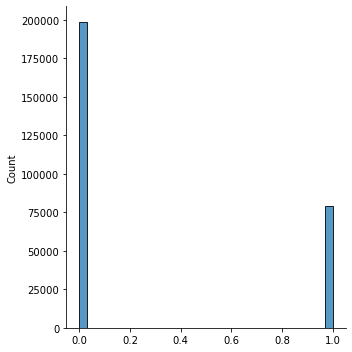

In [4]:
create_train_test()
debug_data()

In [4]:
def show_samples():
    """
    Display some images of the train set (both classes)
    """
    samples_0, samples_1 = [], []
    for i in range(5):
        samples_0.append(next(training_original, lambda x: x[1][0][1] == 0)[0][0])
    for i in range(5):
        samples_1.append(next(training_original, lambda x: x[1][0][1] == 1)[0][0])
    for i in range(2):
        fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(8, 8), dpi=100)
        axes = axes.ravel()
        fig.suptitle("Classe 0" if i == 0 else "Classe 1", fontsize=13, y=.65)
        for y, ax in enumerate(axes):
            if i == 0:
                image = samples_0[y]
            else:
                image = samples_1[y]
            ax.imshow(image/255)

def show_augmented_vs_original():
    """
    Display original and augmented images
    """
    training_original.reset()
    training_augmented.reset()
    for i in range(2):
        fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(8, 8), dpi=100)
        axes = axes.ravel()
        fig.suptitle("Original data" if i == 0 else "Augmented data", fontsize=13, y=.65)
        for ax in axes:
            if i == 0:
                image = next(training_original)[0][0]
            else:
                image = next(training_augmented)[0][0]
            ax.imshow(image/255)

In [5]:
img_datagen_original = ImageDataGenerator()
img_datagen_augmented = ImageDataGenerator(rotation_range=40, horizontal_flip=True, vertical_flip=True, brightness_range=[.7, 1.3], zoom_range=.15)

training_original = img_datagen_original.flow_from_directory(train_path, target_size=(51,51), classes=["0", "1"], batch_size=1, shuffle=False)
training_augmented = img_datagen_augmented.flow_from_directory(train_path, target_size=(51,51), classes=["0", "1"], batch_size=1, shuffle=False)

Found 194506 images belonging to 2 classes.
Found 194506 images belonging to 2 classes.


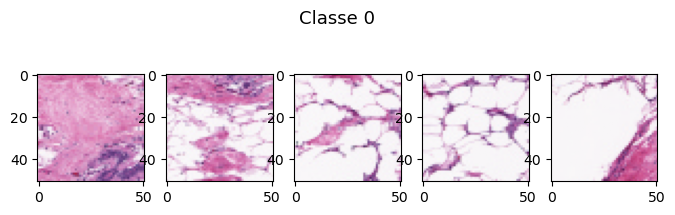

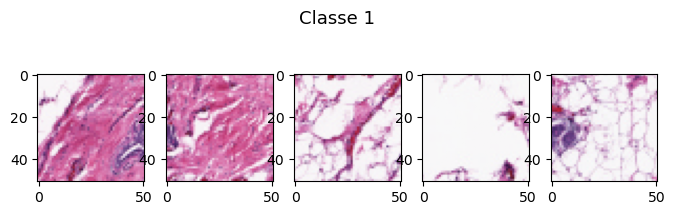

In [6]:
show_samples()

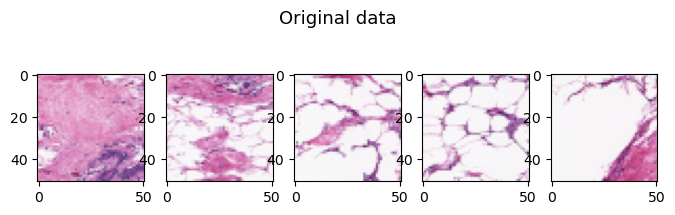

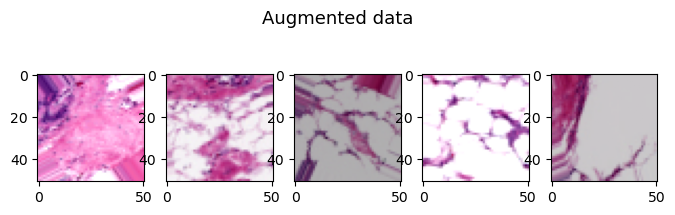

In [7]:
show_augmented_vs_original()

In [8]:
def pixels_distribution(n_samples=5000):
    """
    Used to show global pixel distribution of images depending of their class
    :param n_samples: distribution based of n images
    """
    samples_0, samples_1 = [], []
    for i in range(n_samples):
        samples_0.append(next(training_original, lambda x: x[1][0][1] == 0)[0][0])
    for i in range(n_samples):
        samples_1.append(next(training_original, lambda x: x[1][0][1] == 1)[0][0])

    samples_0, samples_1 = np.array(samples_0), np.array(samples_1)
    r_0, g_0, b_0 = np.unique(samples_0[...,0], return_counts=True), np.unique(samples_0[...,1], return_counts=True), np.unique(samples_0[...,2], return_counts=True)
    r_1, g_1, b_1 = np.unique(samples_1[...,0], return_counts=True), np.unique(samples_1[...,1], return_counts=True), np.unique(samples_1[...,2], return_counts=True)

    class_distribution = {"0": np.unique(samples_0, return_counts=True), "1": np.unique(samples_1, return_counts=True)}
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
    axes = axes.ravel()
    fig.suptitle("Pixel distribution. (5'000 images of each classes)")
    axes[0].set_title("Begnin patient"); axes[1].set_title("Affected patient")
    sns.barplot(x=class_distribution["0"][0], y=class_distribution["0"][1], ax=axes[0])
    sns.barplot(x=class_distribution["1"][0], y=class_distribution["1"][1], ax=axes[1])
    for i, ax in enumerate(axes):
        ax.set_xticks(class_distribution[str(i)][0][::20])
        ax.set_xticklabels(class_distribution[str(i)][0][::20], rotation=45)
        ax.set_xlabel("Pixel value")
        ax.set_ylabel("Count")

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))
    axes = axes.ravel()
    axes[0].set_title("Red"); axes[1].set_title("Green"); axes[0].set_title("Blue")
    colors = ["Red", "Green", "Blue"]
    for i, dist in enumerate([[r_0, r_1], [b_0, b_1], [g_0, g_1]]):
        axes[i].set_xlabel("Pixel value")
        axes[i].set_ylabel("Counts")
        axes[i].set_title(f"Dimension: {colors[i]}")
        sns.lineplot(x=dist[0][0], y=dist[0][1], ax=axes[i], label="Classe 0")
        sns.lineplot(x=dist[1][0], y=dist[1][1], ax=axes[i], label="Classe 1")

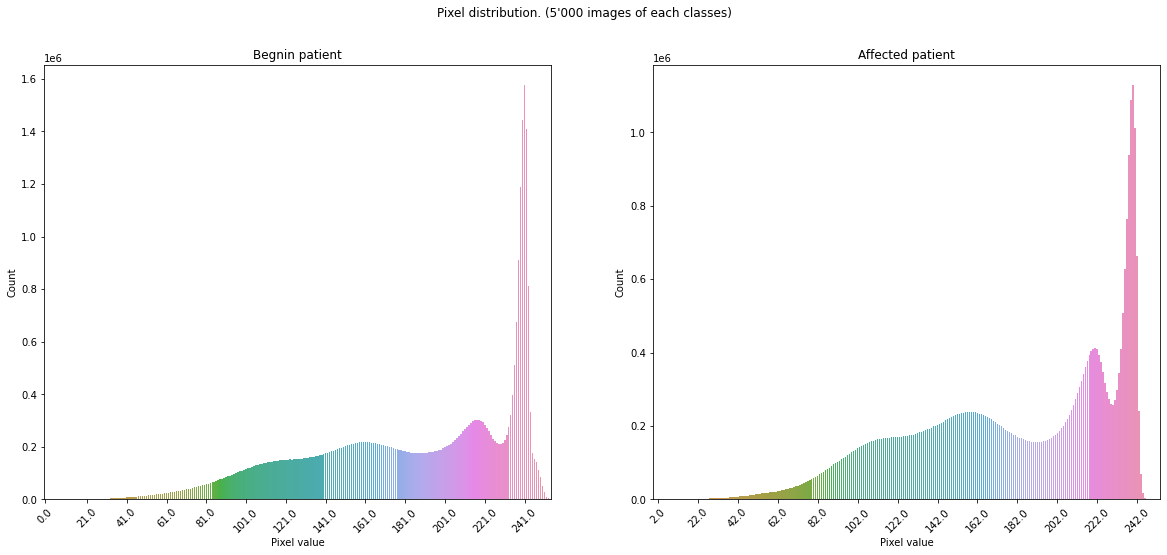

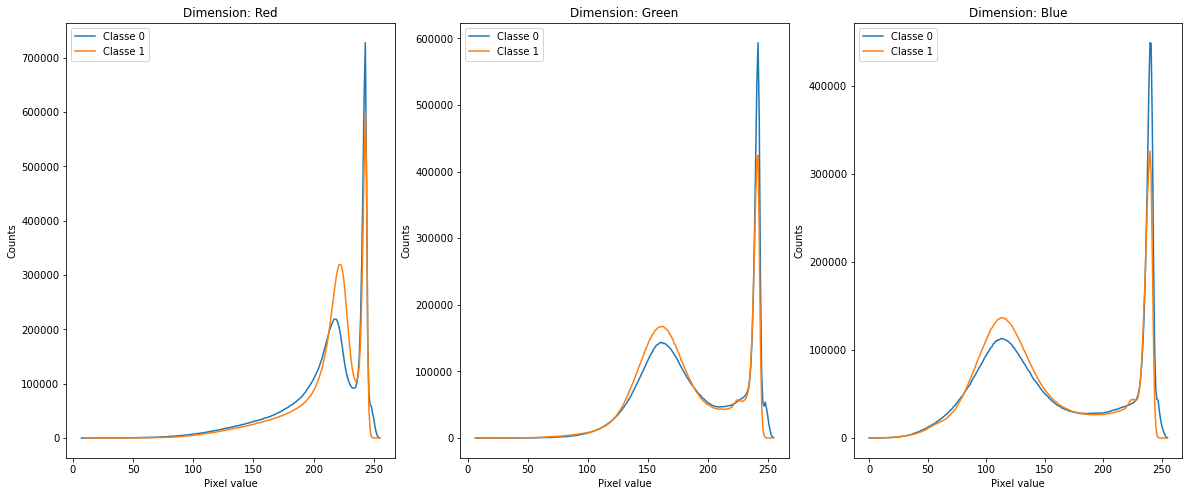

In [9]:
pixels_distribution()